**Checking and Preparing the Environment**

In the following code cell, we automatically determine if this notebook is running in Google Colaboratory (Colab) and, if so, mount a Google Drive for easy access to files. This setup is crucial for seamless integration with Google Drive, facilitating file access and storage during our session.

Please ensure that the dataset (our source is given below) is uploaded to the google drive. You may need to check the pathway given in the code and ensure your data is uploaded to the right location.

In [ ]:
# Attempt the code block
try:
    # Import drive from google.colab
    from google.colab import drive

    # Mount Google Drive, force remount
    drive.mount('/content/drive', force_remount=True)

    # Set COLAB True if code runs
    COLAB = True

    # Print success message with details
    print("Success: Google Colab is in use and your Google Drive is mounted at '/content/drive'.\n"
          "You can now access your Drive files using this path. Remember to save any work on Drive to prevent loss.")

# Catch exceptions
except Exception as e:
    # Informative error message
    print(f"Note: not using Google CoLab - encountered error: {type(e).__name__}: {e}")

    # Set COLAB False if exception
    COLAB = False


Mounted at /content/drive
Success: Google Colab is in use and your Google Drive is mounted at '/content/drive'.
You can now access your Drive files using this path. Remember to save any work on Drive to prevent loss.


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Breast')

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

## Data Set and Basic Visualisations

The data set can be downloaded from https://www.kaggle.com/code/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/input

In [ ]:
# Loading data followed by basic checks.
X = np.load('/content/drive/MyDrive/Colab Notebooks/X.npy')
Y = np.load('/content/drive/MyDrive/Colab Notebooks/Y.npy')

print("Shape of images dataset :", X.shape)
print("Shape of labels :", Y.shape)

Shape of images dataset : (5547, 50, 50, 3)
Shape of labels : (5547,)


In [ ]:
# Split: Separate out the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (4437, 50, 50, 3)
Shape of X_test: (1110, 50, 50, 3)
Shape of Y_train: (4437,)
Shape of Y_test: (1110,)


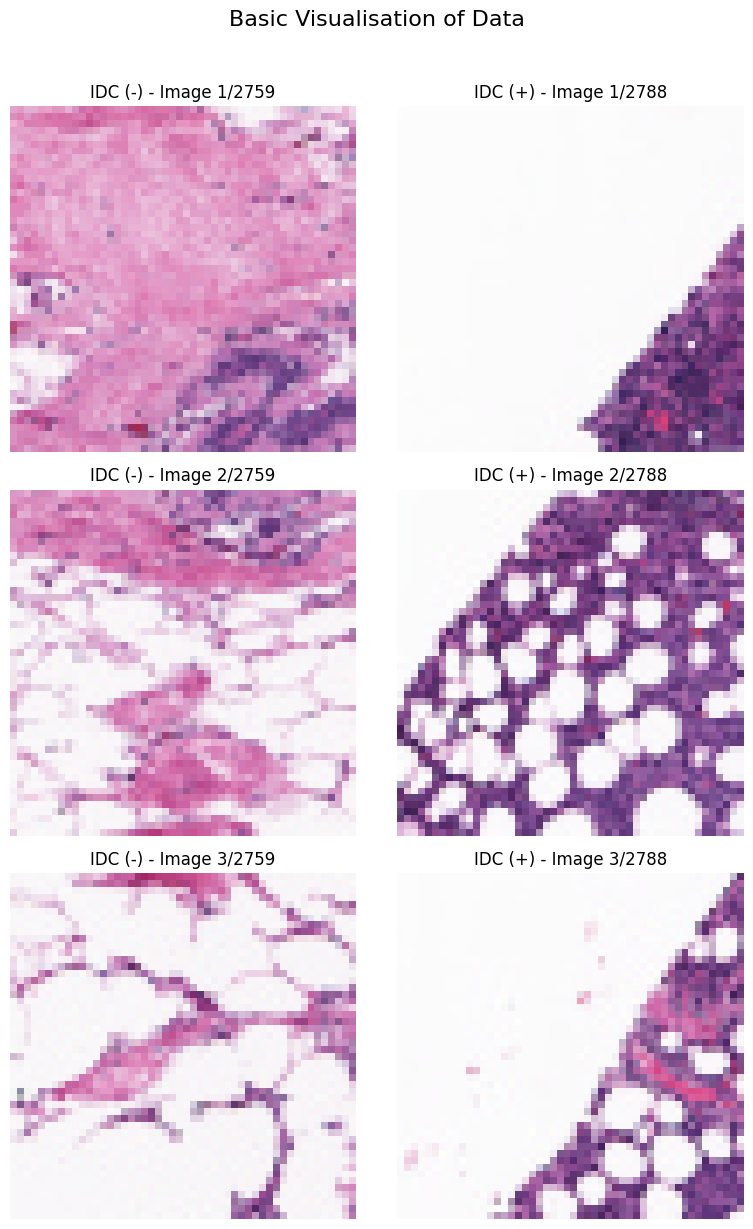

In [ ]:
def plot_images_in_pairs(imgs0, imgs1, n):
    """
    Plot 'n' pairs of images, where each pair has one image with IDC (-) and one with IDC (+).
    Also display the total number of images available in each dataset.
    """
    # Determining the number of images available
    num_imgs0 = imgs0.shape[0]
    num_imgs1 = imgs1.shape[0]

    fig, axs = plt.subplots(n, 2, figsize=(8, n * 4))  # Adjust the figure size as needed
    fig.suptitle('Basic Visualisation of Data', fontsize=16, y=1.02)
    for i in range(n):
        # Checking if i is less than the number of images in each category to avoid IndexError
        if i < num_imgs0:
            axs[i, 0].imshow(imgs0[i])
            axs[i, 0].set_title(f'IDC (-) - Image {i+1}/{num_imgs0}')
            axs[i, 0].axis('off')  # Hide the axes
        if i < num_imgs1:
            axs[i, 1].imshow(imgs1[i])
            axs[i, 1].set_title(f'IDC (+) - Image {i+1}/{num_imgs1}')
            axs[i, 1].axis('off')  # Hide the axes

    plt.tight_layout()
    plt.show()

# Calling the function with n pairs of images  want to display
imgs0 = X[Y==0] # (0 = no IDC, 1 = IDC)
imgs1 = X[Y==1]
plot_images_in_pairs(imgs0, imgs1, n=3)  # We can alter 'n=' with the number of image pairs we want to display

**Preprocessing**

Flattening Images

Our images in our dataset were in a 3D array of shape (50,50,3).
Transformed into one-dimensional vector of shaoe (7500). Makes data compatible with dimensionality reduction techniques.

In [ ]:
# Flattening the images
X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

Standardisation

We used the StandardScaler function to standardise pixel intensities to a scale of 0 to 1. Can aid in dimensionality reduction techniques.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

**Exploratory Data Analysis**

 Producing a statistical summary

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

# Note: Changing 'images' to 'data' since that's what we've named your dataset variable
pixels = X.flatten()

# Calculate statistical summaries
mean_val = np.mean(pixels)
median_val = np.median(pixels)
std_dev_val = np.std(pixels)
skewness_val = skew(pixels)
kurtosis_val = kurtosis(pixels)

print(f"Mean pixel value: {mean_val}")
print(f"Median pixel value: {median_val}")
print(f"Standard deviation of pixel values: {std_dev_val}")
print(f"Skewness of pixel values: {skewness_val}")
print(f"Kurtosis of pixel values: {kurtosis_val}")

Mean pixel value: 185.03374477495342
Median pixel value: 190.0
Standard deviation of pixel values: 47.24814394300702
Skewness of pixel values: -0.5718218971492108
Kurtosis of pixel values: -0.4866846950024639


Producing a histogram showing pixel intensities across histology images

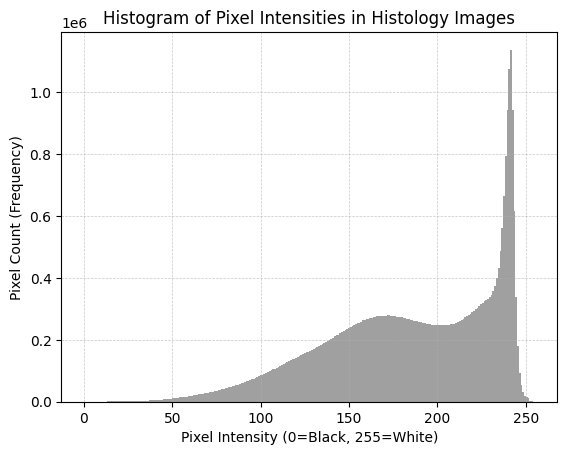

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'pixels' is a 1D numpy array containing all pixel values from your images


# Plotting a histogram of pixel intensities with improved title and axis labels
plt.hist(pixels, bins=256, range=[0, 255], color='gray', alpha=0.75)
plt.title('Histogram of Pixel Intensities in Histology Images')
plt.xlabel('Pixel Intensity (0=Black, 255=White)')
plt.ylabel('Pixel Count (Frequency)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Removing plt.yscale('log') to keep the y-axis on a linear scale
plt.show()



A quick visualisation check

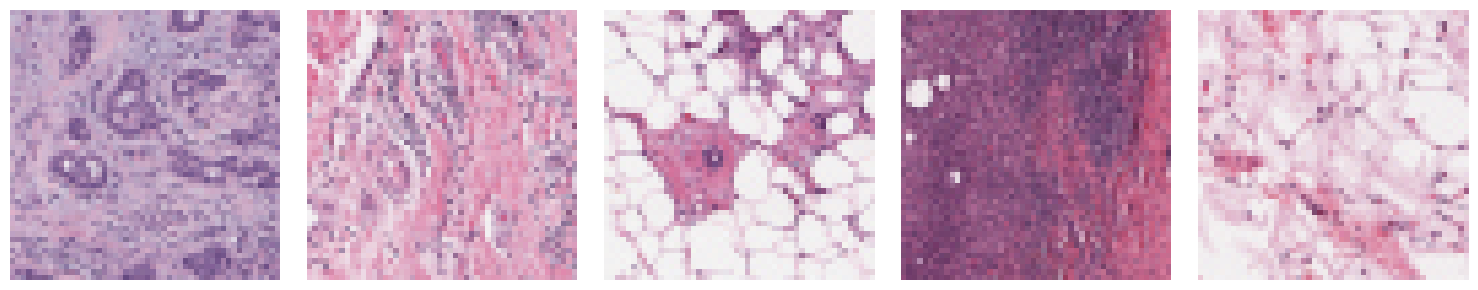

In [ ]:
# Displaying the first few images from the dataset
num_images_to_show = 5

fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
for i, ax in enumerate(axes):
    # Assuming 'data' is in (samples, height, width, channels) format
    ax.imshow(X_train[i])
    ax.axis('off')
plt.tight_layout()
plt.show()


Producing our PCA Plot

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import pandas as pd

# Performing 2D PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Converting PCA results to a DataFrame for easier plotting
df_pca = pd.DataFrame(X_train_pca, columns=['Principal Component 1 (PC1)', 'Principal Component 2 (PC2)'])
df_pca['Diagnosis'] = Y_train  # No need to convert to string for discrete color mapping

# Defining a mapping from the label numbers to a descriptive category
diagnosis_labels = {0: 'IDC Negative', 1: 'IDC Positive'}
df_pca['Diagnosis'] = df_pca['Diagnosis'].map(diagnosis_labels)

# Creating the scatter plot with discrete colors using Plotly Express
fig = px.scatter(df_pca, x='Principal Component 1 (PC1)', y='Principal Component 2 (PC2)', color='Diagnosis',
                 title='2D PCA Projection of Scaled Training Data',
                 width=800, height=600,  # Image size
                 color_discrete_map={'IDC Positive': 'blue', 'IDC Negative': 'red'},  # Specify discrete colors
                 labels={'Diagnosis': 'IDC Diagnosis'})

# Applying dark mode template and adjust point size
fig.update_traces(marker=dict(size=5))
fig.update_layout(template="plotly_dark")

# Removing the color bar and keep the legend
fig.update_layout(coloraxis_showscale=False)

# Showing the plot
fig.show()


Producing our UMAP plot

In [ ]:
!pip install umap-learn

In [ ]:
from umap import UMAP
import plotly.express as px
import pandas as pd

# Performing UMAP reduction to 2 components for 2D visualization
umap_2d = UMAP(n_components=2, n_neighbors=20, min_dist=1., random_state=42)
X_train_umap_2d = umap_2d.fit_transform(X_train_scaled)

# Converting UMAP results to a DataFrame for easier plotting
df_umap_2d = pd.DataFrame(X_train_umap_2d, columns=['First UMAP Component', 'Second UMAP Component'])
df_umap_2d['Diagnosis'] = Y_train  # Keep as numeric for discrete color mapping

# Defining a mapping from the label numbers to a descriptive category
diagnosis_labels = {0: 'IDC Negative', 1: 'IDC Positive'}
df_umap_2d['Diagnosis'] = df_umap_2d['Diagnosis'].map(diagnosis_labels)

# Creating the 2D scatter plot with discrete colors using Plotly Express
fig = px.scatter(df_umap_2d, x='First UMAP Component', y='Second UMAP Component', color='Diagnosis',
                 title='2D UMAP Visualisation of IDC Diagnosis in Scaled Image Data',
                 width=800, height=600,  # Image size
                 color_discrete_map={'IDC Positive': 'blue', 'IDC Negative': 'red'},
                 labels={'Diagnosis': 'IDC Diagnosis'})

# Applying dark mode template and adjust point size and transparency
fig.update_traces(marker=dict(size=5, opacity=0.7))

# Adjusting layout settings
fig.update_layout(
    template="plotly_dark",
    legend=dict(
        title=dict(text='IDC Diagnosis'),
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    margin=dict(l=20, r=20, t=60, b=20)
)

# Removing the color bar and keep the legend
fig.update_layout(coloraxis_showscale=False)

# Showing the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



**Model Implementation**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# SVM with non-linear kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, Y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, Y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# XGBoost
xgb_model = XGBClassifier(n_estimators=300,
                          max_depth=10,
                          learning_rate=0.05,
                          gamma=0.5,
                          reg_lambda=5,
                          subsample=0.4,
                          colsample_bytree=0.8,
                          random_state=42)
xgb_model.fit(X_train_scaled, Y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

**Evaluation Metrics**

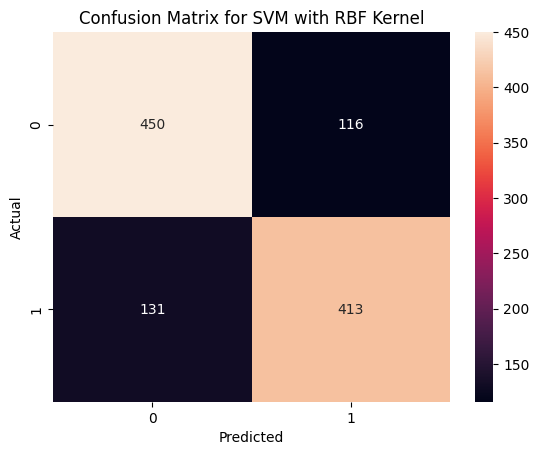

Classification Report for SVM with RBF Kernel:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       566
           1       0.78      0.76      0.77       544

    accuracy                           0.78      1110
   macro avg       0.78      0.78      0.78      1110
weighted avg       0.78      0.78      0.78      1110

Accuracy for SVM with RBF Kernel: 0.7774774774774775




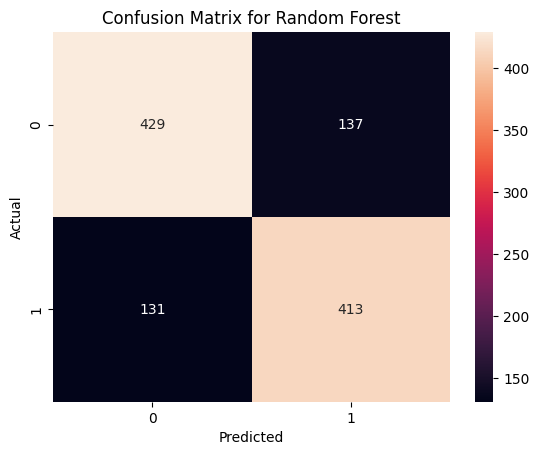

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       566
           1       0.75      0.76      0.76       544

    accuracy                           0.76      1110
   macro avg       0.76      0.76      0.76      1110
weighted avg       0.76      0.76      0.76      1110

Accuracy for Random Forest: 0.7585585585585586




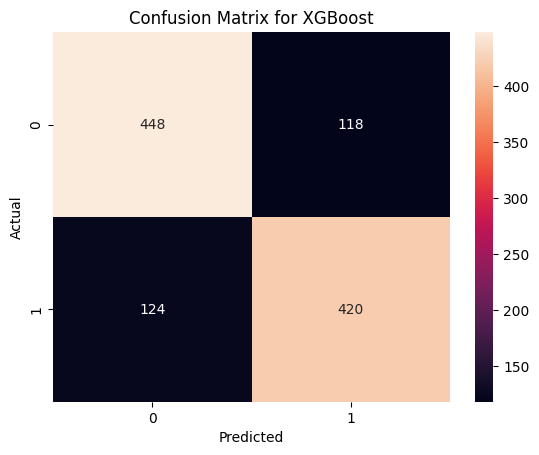

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       566
           1       0.78      0.77      0.78       544

    accuracy                           0.78      1110
   macro avg       0.78      0.78      0.78      1110
weighted avg       0.78      0.78      0.78      1110

Accuracy for XGBoost: 0.781981981981982




In [ ]:
# Function to plot confusion matrix and classification report
def evaluate_model(y_true, y_pred, model_name):
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report and Accuracy
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_true, y_pred))
    print(f'Accuracy for {model_name}: {accuracy_score(y_true, y_pred)}\n\n')


# Evaluating SVM model
evaluate_model(Y_test, svm_predictions, 'SVM with RBF Kernel')

# Evaluating Random Forest model
evaluate_model(Y_test, rf_predictions, 'Random Forest')

# Evaluating XGBoost model
evaluate_model(Y_test, xgb_predictions, 'XGBoost')

ROC Curve

In [ ]:
import plotly.graph_objs as go
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming xgb_model is our trained XGBoost model and X_test_scaled is your test set features
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, xgb_probs)
auc_score = roc_auc_score(Y_test, xgb_probs)

# Creating a trace for the ROC curve
trace_roc = go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve (XGBoost)',
                       line=dict(color='darkorange', width=2),
                       hoverinfo='x+y', showlegend=True)

# Creating a trace for the random line (diagonal)
trace_random = go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance (Baseline)',
                          line=dict(color='navy', width=2, dash='dash'),
                          hoverinfo='x+y', showlegend=True)

# Setting up the layout with a suitable title, axes, units, and labels
layout = go.Layout(
    title='ROC Curve for XGBoost Model',
    xaxis=dict(title='False Positive Rate (1 - Specificity)', range=[0, 1]),
    yaxis=dict(title='True Positive Rate (Sensitivity)', range=[0, 1]),
    showlegend=True,
    legend=dict(
        x=0.6,
        y=0.1,
        title="Legend",
        traceorder="normal",
        font=dict(
            size=12,
        )
    )
)

# Creating the figure and add the traces
fig = go.Figure(data=[trace_roc, trace_random], layout=layout)
fig.update_layout(template="plotly_dark")

# Adding annotations for AUC score
fig.add_annotation(
    x=0.6,
    y=0.2,
    text=f"AUC Score: {auc_score:.2f}",
    showarrow=False,
    font=dict(
        size=14,
        color="white"
    ),
    align="center",
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="black",
    opacity=0.8
)

# Showing the figure
fig.show()

